# Decision Tree Classification

- A tree can be “learned” by splitting the source set into subsets based on **Attribute Selection Measures**.
- Each subset is has a condition that is denoted by a node, which helps in deciding the other 2 node(True, False) connected to current node. 
- Each node represents the average of all the data point present in the subset.
<img src="https://media.springernature.com/lw685/springer-static/image/prt%3A978-1-4899-7687-1%2F18/MediaObjects/978-1-4899-7687-1_18_Part_Fig1-717_HTML.gif">

- **Splits are done with the purpose to maximize the categories or finding the optimal splits**

### Key difference btwn DT Classification & Regression
1. Nature of Output:
    - Classification: Discrete class labels.
    - Regression: Continuous numerical values.

1. Splitting Criteria:
    - Classification: Gini impurity, entropy.
    - Regression: Mean squared error, variance reduction.
1. Use Cases:
    - Classification: Tasks involving categorical outcomes.
    - Regression: Tasks involving numerical predictions.

### Use Cases
Suppose you have :

1. Decision Tree Classification 
    - A dataset of patient data and you want to predict whether a patient has a certain disease (yes or no).
    - would be appropriate since the output is a class label (yes or no).

2. Decision Tree Regression
    - A dataset of house characteristics and you want to predict the house price.
    - would be appropriate since the output is a continuous value (price).

### Pre-processing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing dataset
dataset = pd.read_csv('./class_dataset/Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Implementing Decision tree Classification

In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is created")
print(cm)

Confusion Matrix is created
[[62  6]
 [ 3 29]]


### Visualizing the dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


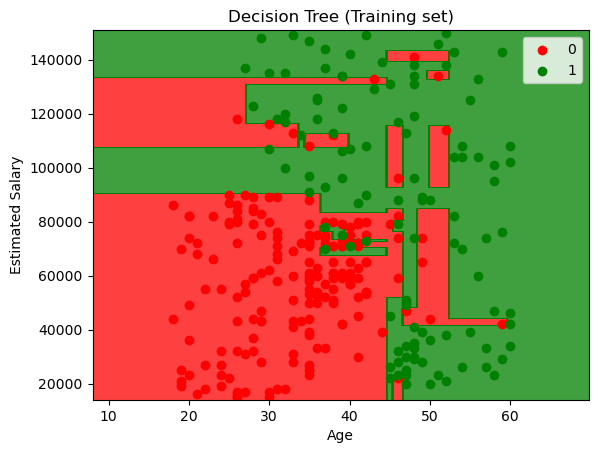

In [6]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


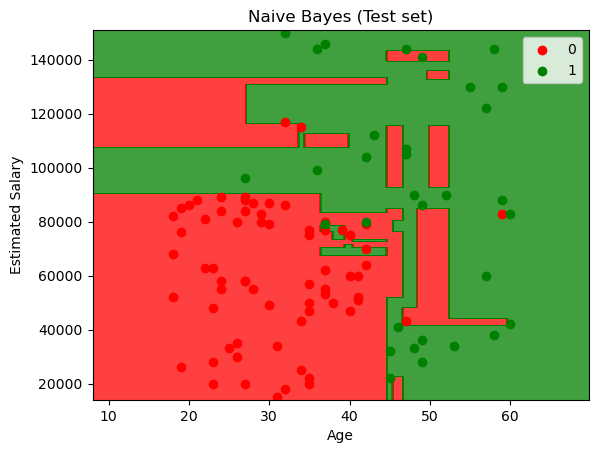

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- Although, Decision tree Algorithem has been hear for some time, It has goten old, and has limited use cases.

- Now more Upgraded versions of Decision tree are used in morden day complex applications. **eg.**  
    - Random Forest
    - Gradient Boosting
    - etc